In [27]:
from utilities.utils import Utils
import pandas as pd
from plotManager import plotManager
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
data_path = Utils.load_config("RAW_DATASET_PATH")

df = pd.read_csv(data_path, index_col='instant', parse_dates=True)
df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,10.5,13.6,81.0,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,9.7,12.9,80.0,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,9.7,12.9,80.0,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,10.5,13.6,75.0,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,10.5,13.6,75.0,0.0,0,1,1


In [29]:
plotMan = plotManager(df)

### Density of probability for attributes

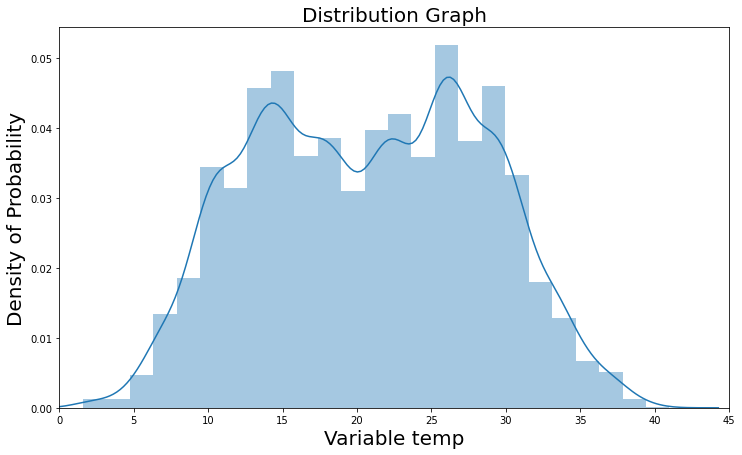

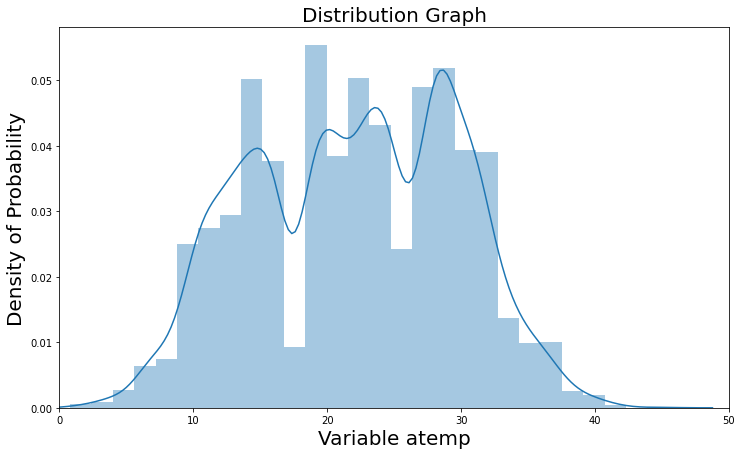

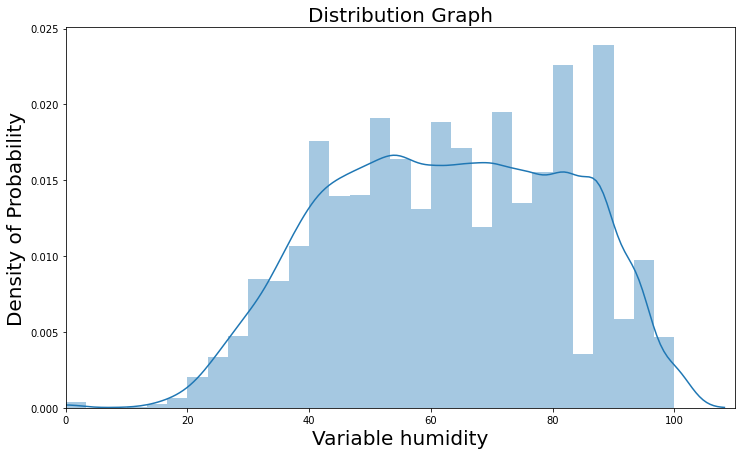

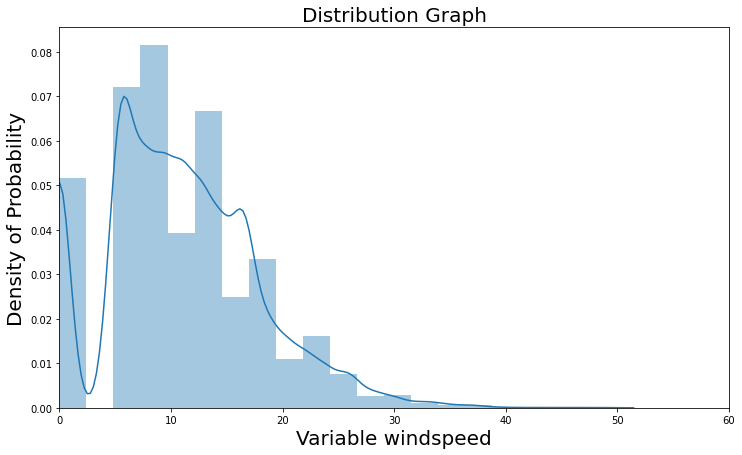

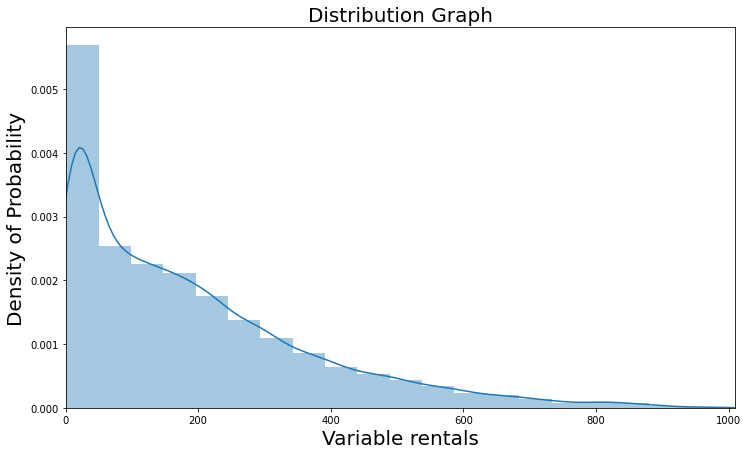

In [30]:
plotManager.distribution_plot(df, "temp", 25, 45)
plotManager.distribution_plot(df, "atemp", 28, 50)
plotManager.distribution_plot(df, "humidity", 30, 110)
plotManager.distribution_plot(df, "windspeed", 20, 60)
plotManager.distribution_plot(df, "rentals", 20, 1010)

### Number of rentals based on different factors

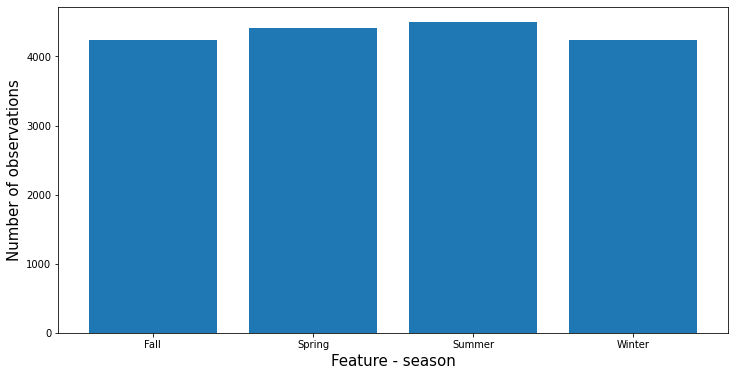

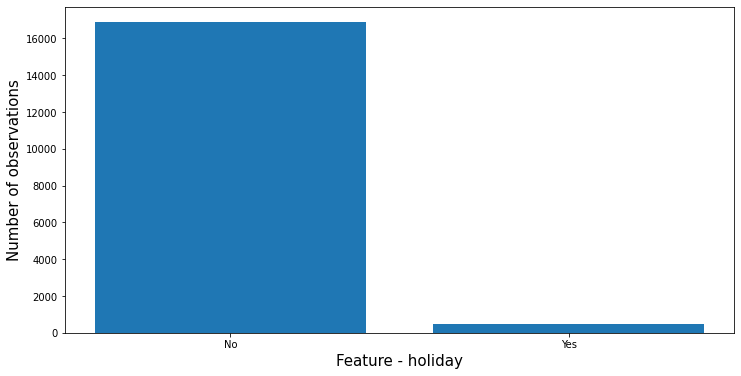

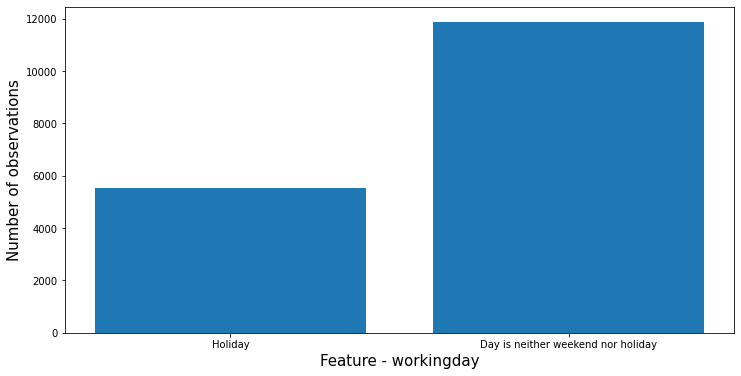

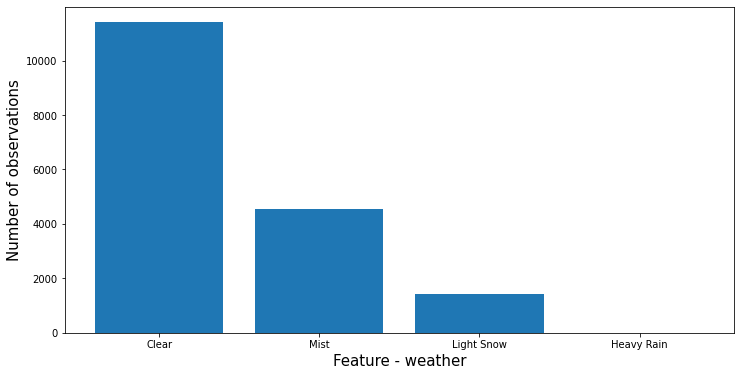

In [31]:
plotManager.histogram_plot(df, "season")
plotManager.histogram_plot(df, "holiday")
plotManager.histogram_plot(df, "workingday")
plotManager.histogram_plot(df, "weather")

### Bivariate analysis for target variable (rentals)

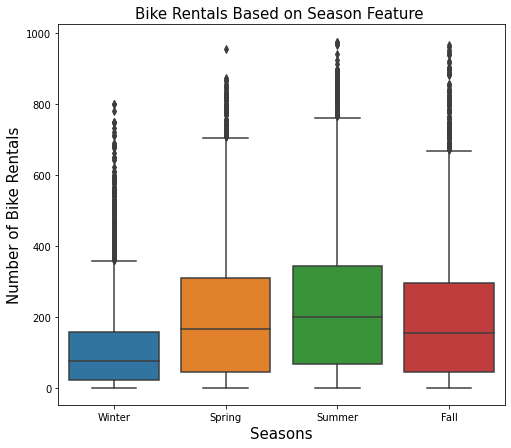

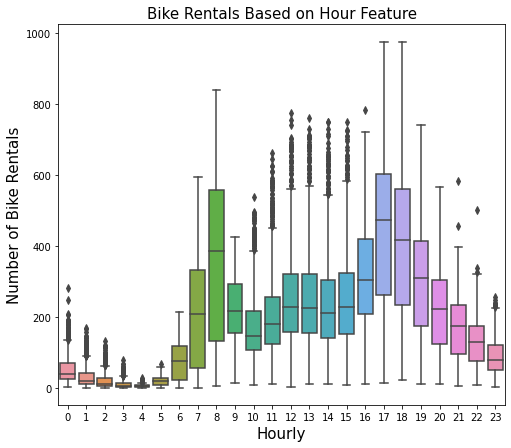

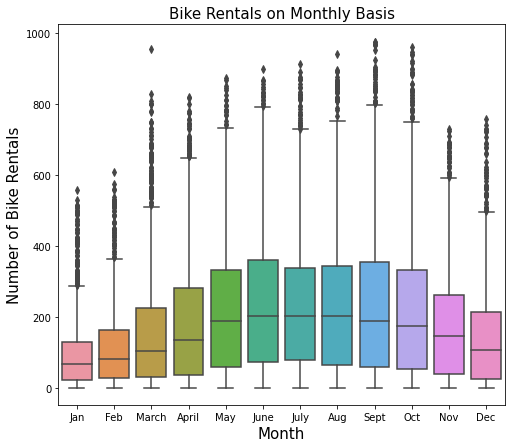

In [32]:
plotManager.box_plot(df, "season")
plotManager.box_plot(df, "hour")
plotManager.box_plot(df, "month")

### Scatter Plots

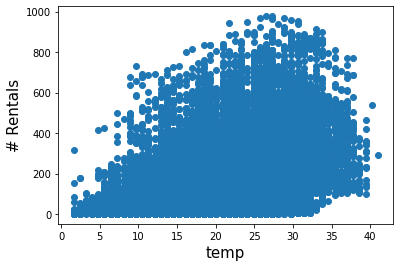

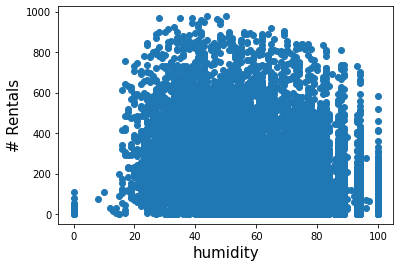

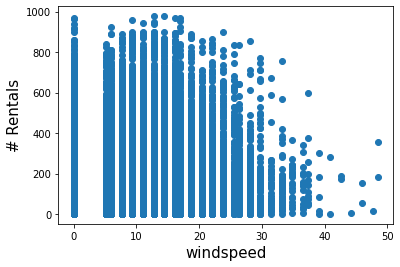

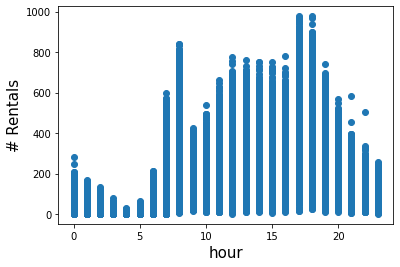

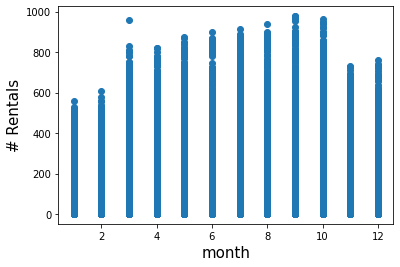

In [33]:
plotManager.scatter_plot(df, "temp")
plotManager.scatter_plot(df, "humidity")
plotManager.scatter_plot(df, "windspeed")
plotManager.scatter_plot(df, "hour")
plotManager.scatter_plot(df, "month")

### Attribute correlation

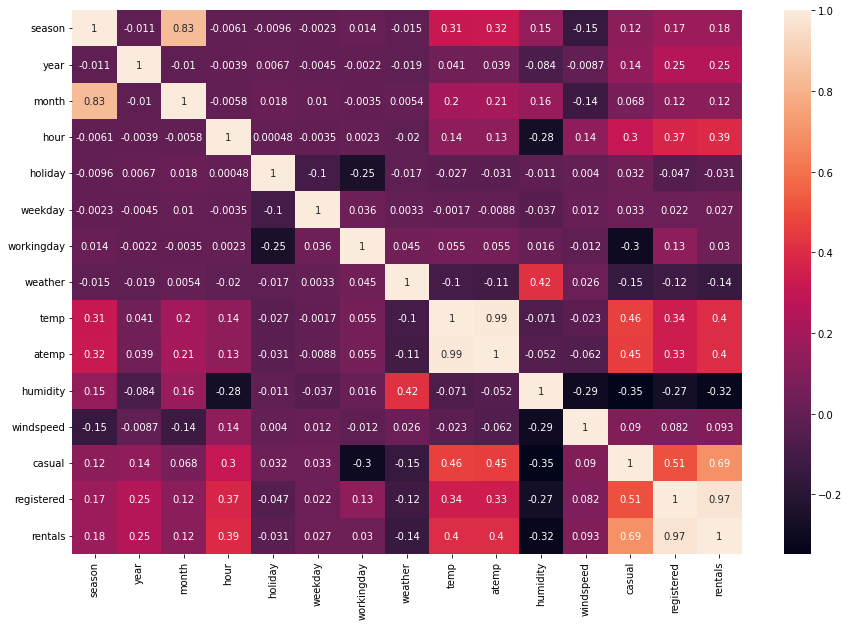

In [34]:
plotManager.correlation_matrix_plot(df)

### Delete higly correlated data

In [35]:
df.drop('atemp',axis=1,inplace=True)

### Delete non predictable attributes

Both 'casual' and 'registered' attributes are not predictable apriori for future days, while all the other features could be gathered in some way (e.g. via weather APIs)

In [36]:
df.drop(['casual', 'registered'],axis=1,inplace=True)

## Plotting of the target variable flow

<AxesSubplot:xlabel='date'>

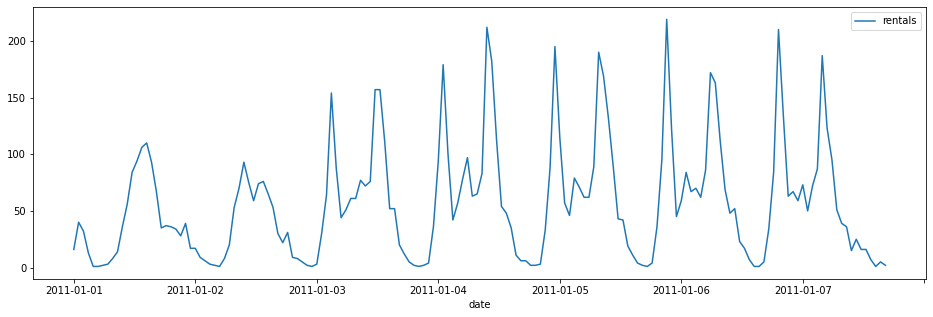

In [37]:
df[:24*7].plot(x='date', y='rentals', figsize=[16,5])

### Export analyzed dataset

In [38]:
df.to_csv('data/1_bike_rental_dataset_analyzed.csv', header=True);